# Neural Network Implementation

In [52]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
dataset.shape

(10000, 14)

In [19]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [20]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [23]:
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
#to avoid dummy variable trap
X = X[:, 1:]

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train=X_train.T
X_test=X_test.T
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
y_train=y_train.T
y_test=y_test.T

In [27]:
shape_X=X_train.shape
shape_Y=y_train.shape
m=X_train.shape[1]

In [28]:
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (11, 8000)
The shape of Y is: (1, 8000)
I have m = 8000 training examples!


In [29]:
def layer_sizes(X,Y):
    n_x=X.shape[0]
    n_h=10
    n_y=Y.shape[0]
    return (n_x,n_h,n_y)

In [30]:
(n_x,n_h,n_y)=layer_sizes(X_train,y_train)

In [31]:
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 11
The size of the hidden layer is: n_h = 10
The size of the output layer is: n_y = 1


In [32]:
def initialize_parameters(n_x,n_h,n_y):
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    parameters={
            "W1":W1,
            "b1":b1,
            "W2":W2,
            "b2":b2}
    return parameters

In [33]:
parameters=initialize_parameters(n_x,n_h,n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-3.30237550e-03 -1.79864211e-03 -3.03942507e-03 -1.07481983e-02
  -1.66605042e-02  8.20913677e-03  3.93521058e-03  1.50949194e-02
  -9.53445729e-04 -4.67080468e-03 -2.05053949e-03]
 [ 9.74314607e-03 -1.92353978e-03 -1.15568746e-02  1.47297715e-02
   1.68651217e-02  6.80462910e-04 -4.93480165e-03 -1.72267539e-03
  -1.25561595e-03  8.76028226e-03 -3.65107625e-03]
 [-1.19600707e-03 -8.27143156e-03  9.02788743e-04 -2.90608236e-03
  -1.17560478e-02  4.66743689e-03 -3.57860870e-03 -8.51703328e-03
   1.32178187e-04 -2.13487757e-02 -3.85836581e-03]
 [ 5.92426653e-03 -2.79691761e-03 -3.23002787e-03 -7.23826466e-03
   1.11349345e-03  7.61632276e-03 -9.77192533e-03  8.39441319e-03
  -1.30036958e-02  5.85419759e-03  5.59226153e-03]
 [-3.90413442e-03  2.85901933e-03 -1.12031258e-02 -3.40081688e-03
   7.19026436e-03 -4.48288946e-03  9.18705817e-03 -3.92568734e-03
   1.05052332e-03  3.94336713e-03  1.09135724e-02]
 [-1.52625462e-03  4.65235976e-05  5.73989021e-03 -5.25163361e-03
   1.10050072e

In [34]:
def forward_propagation(X,parameters):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=1/(1+np.exp(-Z2))
    
    cache={
            "Z1":Z1,
            "A1":A1,
            "Z2":Z2,
            "A2":A2}
    return A2,cache

In [35]:
A2,cache=forward_propagation(X_train,parameters)

In [36]:
def compute_cost(A2,Y,parameters):
    m=Y.shape[1]
    logprobs=np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),(1-Y))
    cost=-(1/m)*np.sum(logprobs)
    
    return cost

In [37]:
print("cost = " + str(compute_cost(A2, y_train, parameters)))

cost = 0.6931222685429411


In [38]:
def backward_propagation(parameters,cache,X,Y):
    m=X.shape[1]
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    A1=cache["A1"]
    A2=cache["A2"]
    
    dZ2=A2-Y
    dW2=(1/m)*np.dot(dZ2,A1.T)
    db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.multiply((np.dot(W2.T,dZ2)),(1-np.power(A1,2)))
    dW1 = 1/(m)*np.dot(dZ1,X.T)
    db1 = 1/(m)*np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

In [39]:
grads = backward_propagation(parameters, cache, X_train, y_train)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 1.06293870e-03 -2.63132247e-04 -1.73802297e-04 -6.44800549e-04
   1.72374862e-03 -1.56763892e-04  7.16041103e-04 -3.24348388e-04
  -7.48707391e-05 -9.14817037e-04  6.06241976e-05]
 [ 7.92132538e-04 -1.96087086e-04 -1.28997007e-04 -4.80638833e-04
   1.28484384e-03 -1.17082544e-04  5.33778601e-04 -2.41278965e-04
  -5.55817027e-05 -6.81849055e-04  4.54413528e-05]
 [ 4.66894964e-04 -1.15465431e-04 -7.63048545e-05 -2.82846566e-04
   7.57390006e-04 -6.90944137e-05  3.14541454e-04 -1.42468448e-04
  -3.28038777e-05 -4.02242105e-04  2.67255020e-05]
 [ 1.76168031e-04 -4.36066840e-05 -2.87989627e-05 -1.06754670e-04
   2.85466986e-04 -2.60496830e-05  1.18736226e-04 -5.37806175e-05
  -1.24870845e-05 -1.51699172e-04  1.00885392e-05]
 [-1.08506209e-03  2.68582133e-04  1.76787994e-04  6.57152316e-04
  -1.75816899e-03  1.60398706e-04 -7.30757876e-04  3.30419770e-04
   7.62374314e-05  9.34180840e-04 -6.15764376e-05]
 [ 6.18170366e-04 -1.53002820e-04 -1.01114770e-04 -3.74289726e-04
   1.00159180

In [40]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1-((learning_rate)*dW1)
    b1 = b1-((learning_rate)*db1)
    W2 = W2-((learning_rate)*dW2)
    b2 = b2-((learning_rate)*db2)
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [41]:
parameters = update_parameters(parameters, grads)

In [42]:
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.0045779  -0.00148288 -0.00283086 -0.00997444 -0.018729    0.00839725
   0.00307596  0.01548414 -0.0008636  -0.00357302 -0.00212329]
 [ 0.00879259 -0.00168824 -0.01140208  0.01530654  0.01532331  0.00082096
  -0.00557534 -0.00143314 -0.00118892  0.0095785  -0.00370561]
 [-0.00175628 -0.00813287  0.00099435 -0.00256667 -0.01266492  0.00475035
  -0.00395606 -0.00834607  0.00017154 -0.02086609 -0.00389044]
 [ 0.00571286 -0.00274459 -0.00319547 -0.00711016  0.00077093  0.00764758
  -0.00991441  0.00845895 -0.01298871  0.00603624  0.00558016]
 [-0.00260206  0.00253672 -0.01141527 -0.0041894   0.00930007 -0.00467537
   0.01006397 -0.00432219  0.00095904  0.00282235  0.01098746]
 [-0.00226806  0.00023013  0.00586123 -0.00480249  0.0098031  -0.01399023
  -0.00331284 -0.00303318 -0.00831926 -0.0009574   0.00686428]
 [-0.00101233 -0.00307779  0.00454134 -0.01134131  0.01162686 -0.01559248
  -0.00136506 -0.01283027  0.00562109 -0.00517997  0.00231864]
 [-0.00604681 -0.00238367 -0.0056542

In [43]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
         A2, cache = forward_propagation(X,parameters)
         cost = compute_cost(A2,Y,parameters)
         grads = backward_propagation(parameters,cache,X,Y)
         parameters = update_parameters(parameters,grads,2)
         
         if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [44]:
parameters = nn_model(X_train, y_train, 10, num_iterations=10000, print_cost=True)

Cost after iteration 0: 0.693124
Cost after iteration 1000: 0.320580
Cost after iteration 2000: 0.318327
Cost after iteration 3000: 0.317805
Cost after iteration 4000: 0.317461
Cost after iteration 5000: 0.317252
Cost after iteration 6000: 0.317112
Cost after iteration 7000: 0.316962
Cost after iteration 8000: 0.316740
Cost after iteration 9000: 0.316186


In [45]:
def predict(parameters, X):
    A2, cache = forward_propagation(X,parameters)
    predictions = (A2>0.5)*1
    return predictions

In [46]:
y_pred = predict(parameters, X_test)
print("predictions mean = " + str(np.mean(y_pred)))

predictions mean = 0.148


In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.T, y_pred.T)

In [48]:
cm

array([[1511,   84],
       [ 193,  212]], dtype=int64)

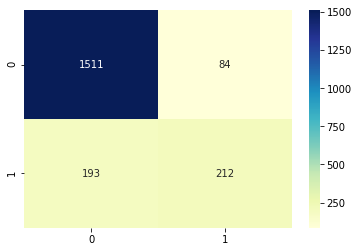

In [55]:
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

In [49]:
accuracy=100*(cm[0][0]+cm[1][1])/X_test.shape[1]

In [50]:
print(str(accuracy)+ "%")

86.15%
